# Space datasets description

In [31]:
import numpy as np
from spacebench import SpaceEnv, DataMaster
import matplotlib.pyplot as plt
import proplot as pplt

In [32]:
space_master = DataMaster()
space_master

Available datasets (total: 11):

  healthd_dmgrcs_mortality_disc
  cdcsvi_limteng_hburdic_cont
  climate_relhum_wfsmoke_cont
  climate_wfsmoke_minrty_disc
  healthd_hhinco_mortality_cont
  ...
  county_educatn_election_cont
  county_phyactiv_lifexpcy_cont
  county_dmgrcs_election_disc
  cdcsvi_nohsdp_poverty_cont
  cdcsvi_nohsdp_poverty_disc

In [34]:
master = space_master.master.copy()
master

,treatment_type,collection
environments,,
healthd_dmgrcs_mortality_disc,binary,Air Pollution and Mortality
cdcsvi_limteng_hburdic_cont,continuous,Social Vulnerability and Welfare
climate_relhum_wfsmoke_cont,continuous,Heat Exposure and Wildfires
climate_wfsmoke_minrty_disc,binary,Heat Exposure and Wildfires
healthd_hhinco_mortality_cont,continuous,Air Pollution and Mortality
healthd_pollutn_mortality_cont,continuous,Air Pollution and Mortality
county_educatn_election_cont,continuous,Welfare and Elections
county_phyactiv_lifexpcy_cont,continuous,Welfare and Elections
county_dmgrcs_election_disc,binary,Welfare and Elections


In [4]:
collections = space_master.list_collections()
collections

['Air Pollution and Mortality',
 'Social Vulnerability and Welfare',
 'Heat Exposure and Wildfires',
 'Welfare and Elections']

In [5]:
space_envs = space_master.list_envs()
space_envs

['healthd_dmgrcs_mortality_disc',
 'cdcsvi_limteng_hburdic_cont',
 'climate_relhum_wfsmoke_cont',
 'climate_wfsmoke_minrty_disc',
 'healthd_hhinco_mortality_cont',
 'healthd_pollutn_mortality_cont',
 'county_educatn_election_cont',
 'county_phyactiv_lifexpcy_cont',
 'county_dmgrcs_election_disc',
 'cdcsvi_nohsdp_poverty_cont',
 'cdcsvi_nohsdp_poverty_disc']

In [6]:
len(space_envs)

11

In [7]:
envname = space_envs[0]
env = SpaceEnv(envname)
env

SpaceEnv with birth certificate config:
{
  "spaceenv": {
    "base_name": "${hydra:runtime.choices.spaceenv}",
    "covariates": [
      "qd_mean_pm25",
      {
        "poverty": [
          "cs_poverty",
          "cs_ed_below_highschool"
        ]
      },
      "cs_population_density",
      "cdc_mean_bmi",
      {
        "smoking": [
          "cdc_pct_cusmoker",
          "cdc_pct_sdsmoker",
          "cdc_pct_fmsmoker",
          "cdc_pct_nvsmoker",
          "cdc_pct_nnsmoker"
        ]
      },
      {
        "temperature": [
          "gmet_mean_tmmn",
          "gmet_mean_summer_tmmn",
          "gmet_mean_winter_tmmn",
          "gmet_mean_tmmx",
          "gmet_mean_summer_tmmx",
          "gmet_mean_winter_tmmx"
        ]
      },
      {
        "relative_humidity": [
          "gmet_mean_rmn",
          "gmet_mean_summer_rmn",
          "gmet_mean_winter_rmn",
          "gmet_mean_rmx",
          "gmet_mean_summer_rmx",
          "gmet_mean_winter_rmx"
        ]
    

In [25]:
for s in space_envs:
    env = SpaceEnv(s, dir="downloads") # to download all environments

Downloaded: filename healthd_dmgrcs_mortality_disc.zip, id 7317967, saved to downloads/healthd_dmgrcs_mortality_disc.zip
Downloaded: filename cdcsvi_limteng_hburdic_cont.zip, id 7327550, saved to downloads/cdcsvi_limteng_hburdic_cont.zip
Downloaded: filename climate_relhum_wfsmoke_cont.zip, id 7331304, saved to downloads/climate_relhum_wfsmoke_cont.zip
Downloaded: filename climate_wfsmoke_minrty_disc.zip, id 7318000, saved to downloads/climate_wfsmoke_minrty_disc.zip
Downloaded: filename healthd_hhinco_mortality_cont.zip, id 7317978, saved to downloads/healthd_hhinco_mortality_cont.zip
Downloaded: filename healthd_pollutn_mortality_cont.zip, id 7317966, saved to downloads/healthd_pollutn_mortality_cont.zip
Downloaded: filename county_educatn_election_cont.zip, id 7317965, saved to downloads/county_educatn_election_cont.zip
Downloaded: filename county_phyactiv_lifexpcy_cont.zip, id 7317975, saved to downloads/county_phyactiv_lifexpcy_cont.zip
Downloaded: filename county_dmgrcs_election_

## Summarize number of covariates

In [18]:
num_covars = dict()
for s in space_envs:
    env = SpaceEnv(s)
    num_covars[s] = len(env.metadata["covariate_groups"])
num_covars

{'healthd_dmgrcs_mortality_disc': 9,
 'cdcsvi_limteng_hburdic_cont': 12,
 'climate_relhum_wfsmoke_cont': 8,
 'climate_wfsmoke_minrty_disc': 10,
 'healthd_hhinco_mortality_cont': 10,
 'healthd_pollutn_mortality_cont': 9,
 'county_educatn_election_cont': 14,
 'county_phyactiv_lifexpcy_cont': 16,
 'county_dmgrcs_election_disc': 14,
 'cdcsvi_nohsdp_poverty_cont': 11,
 'cdcsvi_nohsdp_poverty_disc': 11}

In [43]:
sum(num_covars.values())

117

In [35]:
master = space_master.master.copy()
master.reset_index(inplace=True)

num_covars = dict()
for c in collections:
    environments = master.environments[master.collection == c]
    print(environments)
    covars = []
    for e in environments:
        env = SpaceEnv(e)
        covars.extend(env.metadata["covariates"])
    num_covars[c] = len(set(covars))
num_covars

0     healthd_dmgrcs_mortality_disc
4     healthd_hhinco_mortality_cont
5    healthd_pollutn_mortality_cont
Name: environments, dtype: object
1     cdcsvi_limteng_hburdic_cont
9      cdcsvi_nohsdp_poverty_cont
10     cdcsvi_nohsdp_poverty_disc
Name: environments, dtype: object
2    climate_relhum_wfsmoke_cont
3    climate_wfsmoke_minrty_disc
Name: environments, dtype: object
6     county_educatn_election_cont
7    county_phyactiv_lifexpcy_cont
8      county_dmgrcs_election_disc
Name: environments, dtype: object


{'Air Pollution and Mortality': 34,
 'Social Vulnerability and Welfare': 16,
 'Heat Exposure and Wildfires': 22,
 'Welfare and Elections': 45}

## Summarize graph nodes and edges

In [36]:
num_nodes = dict()
for s in space_envs:
    env = SpaceEnv(s)
    num_nodes[s] = {
        'nodes': env.graph.number_of_nodes(), #len(list(env.graph))
        'edges': env.graph.number_of_edges() 
    }
num_nodes

{'healthd_dmgrcs_mortality_disc': {'nodes': 3109, 'edges': 9237},
 'cdcsvi_limteng_hburdic_cont': {'nodes': 6828, 'edges': 21585},
 'climate_relhum_wfsmoke_cont': {'nodes': 8612, 'edges': 26695},
 'climate_wfsmoke_minrty_disc': {'nodes': 8612, 'edges': 26695},
 'healthd_hhinco_mortality_cont': {'nodes': 3109, 'edges': 9237},
 'healthd_pollutn_mortality_cont': {'nodes': 3109, 'edges': 9237},
 'county_educatn_election_cont': {'nodes': 3108, 'edges': 9236},
 'county_phyactiv_lifexpcy_cont': {'nodes': 3107, 'edges': 9231},
 'county_dmgrcs_election_disc': {'nodes': 3108, 'edges': 9236},
 'cdcsvi_nohsdp_poverty_cont': {'nodes': 6828, 'edges': 21585},
 'cdcsvi_nohsdp_poverty_disc': {'nodes': 6828, 'edges': 21585}}

##

## Summarize feature importance

In [44]:
env.metadata["outcome_importance"]

{'treatment': '1.2912177442864834',
 'EP_NOINT': '0.17869793536744208',
 'EP_AGE17': '0.09967032359457394',
 'EP_DISABL': '0.09875362806045487',
 'EP_NOVEH': '0.0814727318854329',
 'EP_LIMENG': '0.0655948301130956',
 'EP_SNGPNT': '0.06392577211701786',
 'EP_AGE65': '0.05495417319067479',
 'RPL_THEME3': '0.051669917621441526',
 'EP_MUNIT': '0.04203070335096153',
 'EP_UNEMP': '0.035131609796660655',
 'EP_MINRTY': '0.03023542556063022'}

In [45]:
env.metadata["treatment_importance"]

{'EP_LIMENG': '0.334509512494607',
 'EP_NOINT': '0.1723230821941914',
 'EP_MUNIT': '0.09061285345044949',
 'EP_DISABL': '0.04865592909012458',
 'EP_NOVEH': '0.03790226360281446',
 'EP_AGE65': '0.02565013653120691',
 'RPL_THEME3': '0.02177176537184922',
 'EP_AGE17': '0.019656290194017677',
 'EP_UNEMP': '0.01692380142265202',
 'EP_MINRTY': '0.016835656623575706',
 'EP_SNGPNT': '0.015689774235583657'}

In [46]:
env.metadata["confounding_score"]

{'EP_NOINT': '0.1723230821941914',
 'EP_LIMENG': '0.0655948301130956',
 'EP_DISABL': '0.04865592909012458',
 'EP_MUNIT': '0.04203070335096153',
 'EP_NOVEH': '0.03790226360281446',
 'EP_AGE65': '0.02565013653120691',
 'RPL_THEME3': '0.02177176537184922',
 'EP_AGE17': '0.019656290194017677',
 'EP_UNEMP': '0.01692380142265202',
 'EP_MINRTY': '0.016835656623575706',
 'EP_SNGPNT': '0.015689774235583657'}

In [47]:
conf_score = dict()
for s in space_envs:
    env = SpaceEnv(s)
    conf_score[s] = {
        'min': min(env.metadata["confounding_score"].values()), #len(list(env.graph))
        'max': max(env.metadata["confounding_score"].values())
    }
conf_score

{'healthd_dmgrcs_mortality_disc': {'min': '0.0005357302112927932',
  'max': '0.13669170270491512'},
 'cdcsvi_limteng_hburdic_cont': {'min': '0.016930633203702944',
  'max': '0.14144644016357522'},
 'climate_relhum_wfsmoke_cont': {'min': '0.0010006521701149103',
  'max': '0.4130873138508454'},
 'climate_wfsmoke_minrty_disc': {'min': '0.0', 'max': '0.07238058358006749'},
 'healthd_hhinco_mortality_cont': {'min': '0.0036496840866591233',
  'max': '0.0377467449812141'},
 'healthd_pollutn_mortality_cont': {'min': '0.0005556794885295675',
  'max': '0.047482491101395755'},
 'county_educatn_election_cont': {'min': '-0.0006336729263370234',
  'max': '0.06497194862251243'},
 'county_phyactiv_lifexpcy_cont': {'min': '0.0010284461650039113',
  'max': '0.12236077516409485'},
 'county_dmgrcs_election_disc': {'min': '0.00017272190705018916',
  'max': '0.24301972321969859'},
 'cdcsvi_nohsdp_poverty_cont': {'min': '0.014155945805331764',
  'max': '0.12966562629791276'},
 'cdcsvi_nohsdp_poverty_disc': {

In [54]:
print("\n".join(env.metadata.keys()))

base_name
treatment
predicted_outcome
synthetic_outcome
confounding_score
confounding_score_erf
confounding_score_ite
confounding_score_ate
spatial_scores
outcome_importance
treatment_importance
covariates
treatment_values
covariate_groups
original_residual_spatial_score
synthetic_residual_spatial_score
original_nbrs_corr
synthetic_nbrs_corr


In [79]:
conf_score_list = list()
for s in space_envs:
    env = SpaceEnv(s)
    conf_score_list.extend(list(env.metadata["confounding_score_erf"].values()))
conf_score = np.array(conf_score_list, dtype=float)

In [80]:
len(conf_score)

124

In [81]:
print(f"min: {conf_score.min()}")
print(f"q25: {np.quantile(conf_score, 0.25)}")
print(f"median: {np.median(conf_score)}")
print(f"mean: {conf_score.mean()}")
print(f"q75: {np.quantile(conf_score, 0.75)}")
print(f"max: {conf_score.max()}")

min: 0.002138136187568307
q25: 0.01636991137638688
median: 0.03158908151090145
mean: 0.051407477358401184
q75: 0.061821783892810345
max: 0.38876694440841675


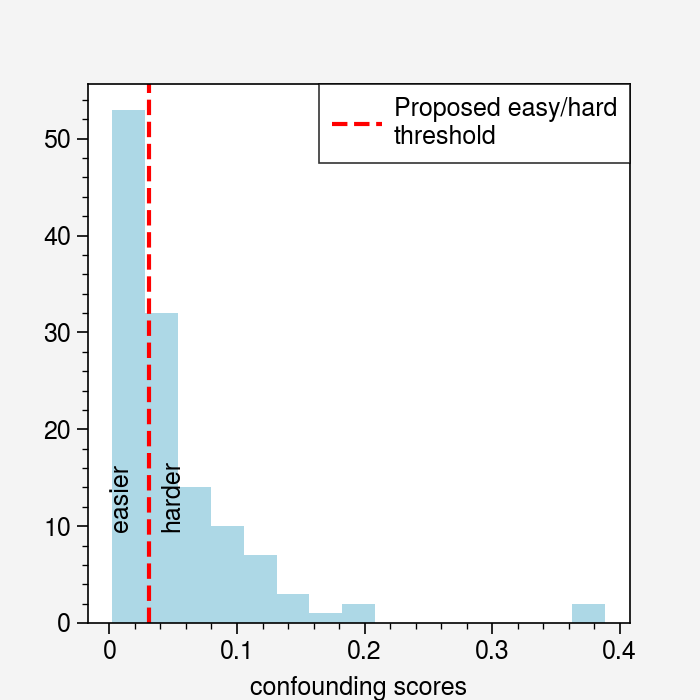

In [98]:
# make a histogram of the confounding scores
# plt.hist(conf_score, bins=20);

# make a histogram of the confounding scores
plt.figure(figsize=(3.5, 3.5))
plt.hist(conf_score, bins=15, color="lightblue");
plt.xlabel("confounding scores")
plt.axvline(x=0.031, color="red", linestyle="--", label="Proposed easy/hard\nthreshold")
plt.text(0.04, 10, "harder", color="black", fontsize=9, rotation=90)
plt.text(0.0, 10, "easier", color="black", fontsize=9, rotation=90)
plt.grid(False)
plt.legend();
plt.savefig("scores-conf.png", bbox_inches="tight")

## Summarize Spatial Smoothness

In [83]:
len(env.metadata["spatial_scores"])

11

In [84]:
len(env.metadata["covariate_groups"])

11

In [85]:
spatial_score_list = list()
for s in space_envs:
    env = SpaceEnv(s)
    for d in env.make_all():
        spatial_score_list.append(d.smoothness_score)
spatial_score = np.array(spatial_score_list)
spatial_score = spatial_score.astype(float)

In [86]:
len(spatial_score)

124

In [87]:
print(f"min: {spatial_score.min()}")
print(f"q25: {np.quantile(spatial_score, 0.25)}")
print(f"median: {np.median(spatial_score)}")
print(f"mean: {spatial_score.mean()}")
print(f"q75: {np.quantile(spatial_score, 0.75)}")
print(f"max: {spatial_score.max()}")

min: 0.02737651003982136
q25: 0.3074514491587701
median: 0.4595133696160426
mean: 0.508165155937094
q75: 0.6968460129930749
max: 0.95597385049487


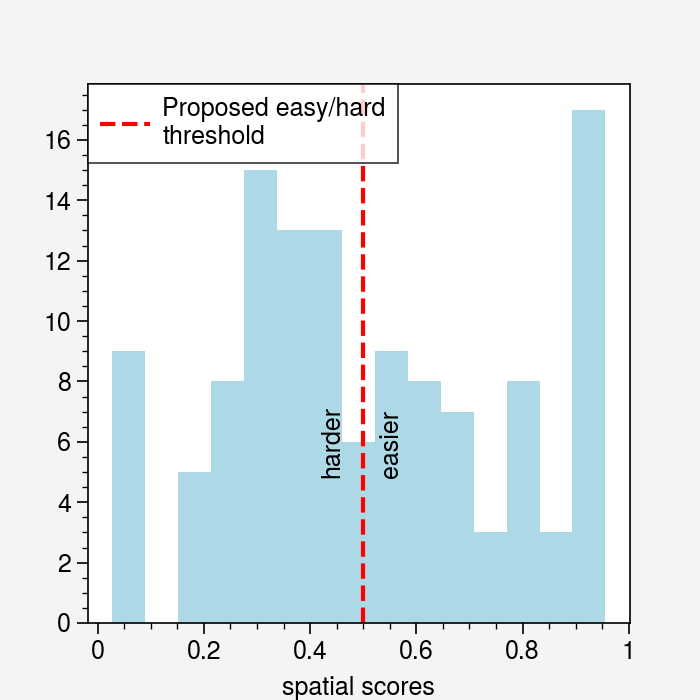

In [99]:
# make a histogram of the spatial smoothness scores
plt.figure(figsize=(3.5, 3.5))
plt.hist(spatial_score, bins=15, color="lightblue")
plt.xlabel("spatial scores")
plt.axvline(x=0.5, color="red", linestyle="--", label="Proposed easy/hard\nthreshold")
plt.text(0.42, 5, "harder", color="black", fontsize=9, rotation=90)
plt.text(0.53, 5, "easier", color="black", fontsize=9, rotation=90)
plt.grid(False)
plt.legend();
plt.savefig("scores-spatial.png", bbox_inches="tight")

## Number of datasets for each level of difficulty

In [90]:
print("conf.   spatial  #")
print(f"easy    low      {np.sum((conf_score < 0.03) & (spatial_score < 0.5))}")
print(f"hard    high     {np.sum((conf_score > 0.03) & (spatial_score > 0.5))}")
print(f"easy    high     {np.sum((conf_score < 0.03) & (spatial_score > 0.5))}")
print(f"hard    low      {np.sum((conf_score > 0.03) & (spatial_score < 0.5))}")


conf.   spatial  #
easy    low      31
hard    high     33
easy    high     26
hard    low      34
